In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np
import numpy as np 
import pandas as pd
import os
print(os.listdir("C://Users//Dell_USA//Downloads//Data"))

['men', 'women']


(1500, 1117, 3)


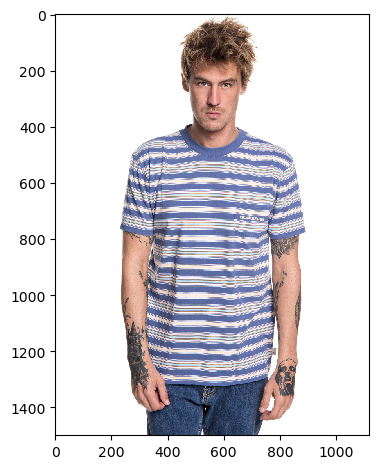

In [9]:
from skimage import io
man1 = io.imread('C://Users//Dell_USA//Downloads//Data/men/man (1).jpg')
io.imshow(man1)
print(man1.shape)

In [11]:
from skimage.transform import resize
X_train=[]
Y_train=[]
for i in range(1,1301):
    man = io.imread('C://Users//Dell_USA//Downloads//Data/men/man ({}).jpg'.format(i))
    man_ = resize(man, (100,100,3))
    X_train.append(man_)
    Y_train.append(1)
for i in range(1,1301):
    women = io.imread('C://Users//Dell_USA//Downloads//Data/women/women ({}).jpg'.format(i))
    women_ = resize(women, (100,100,3))
    X_train.append(women_)
    Y_train.append(0)

In [12]:
X_train, Y_train = np.asarray(X_train), np.asarray(Y_train) 
print('X_train shape: ', X_train.shape, 'Y_train shape: ',Y_train.shape)

X_train shape:  (2600, 100, 100, 3) Y_train shape:  (2600,)


In [13]:
Y_train = Y_train.reshape(len(Y_train), 1)

In [14]:
print(X_train)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [15]:
import matplotlib.pyplot as plt
import random

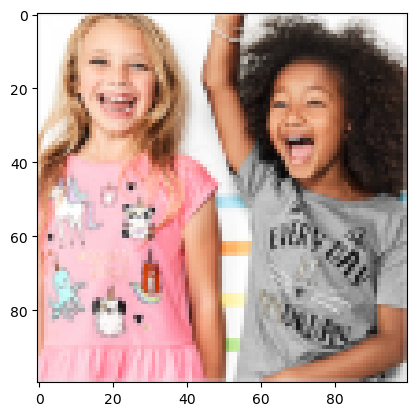

In [21]:
idx = random.randint(0 , len(X_train))
plt.imshow(X_train[idx, :])

In [23]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
           
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])

In [24]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)),)

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [25]:
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.9678 - loss: 0.1106
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9811 - loss: 0.0765
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.9958 - loss: 0.0395
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.9980 - loss: 0.0288
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9962 - loss: 0.0246


In [29]:
model.evaluate(X_train, Y_train)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9992 - loss: 0.0186


[0.014158448204398155, 0.9992307424545288]

In [36]:
from skimage.transform import resize
X_test=[]
Y_test=[]
for i in range(1,8):
    test = io.imread('C://Users//Dell_USA//Downloads//Data/Gmail_2/man ({}).jpg'.format(i))
    test_ = resize(test, (100,100,3))
    X_test.append(test_)
    Y_test.append(1)
for i in range(1,10):
    test = io.imread('C://Users//Dell_USA//Downloads//Data/Gmail_2/women ({}).jpg'.format(i))
    test_ = resize(test, (100,100,3))
    X_test.append(test_)
    Y_test.append(0)

In [37]:
X_test, Y_test = np.asarray(X_test), np.asarray(Y_test) 
print('X_test shape: ', X_test.shape, 'Y_test shape: ',Y_test.shape)

X_test shape:  (16, 100, 100, 3) Y_test shape:  (16,)


In [38]:
Y_train = Y_train.reshape(len(Y_train), 1)

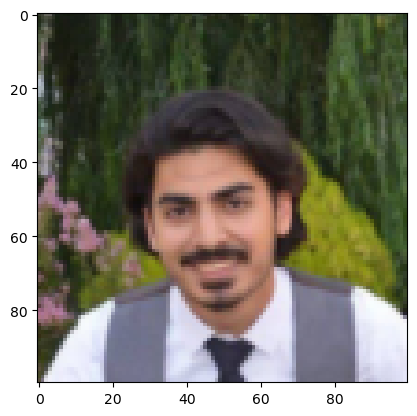

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.1384328]]
women


In [58]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'women'
else:
    pred = 'man'

print(pred)